Demostración de las ecuaciones 2.89:

La serie de taylor de una función es:
$$f(x+\Delta x)=f(x)+f'(x)\Delta x+f''(x)\frac{(\Delta x)^2}{2}+f'''(x)\frac{(\Delta x)^3}{6}+\dotsb$$
En el caso de una partícula moviéndose en el tiempo, se tiene la serie de taylor de su trayectoria:
$$x(t+\Delta t)=x(t)+v(t)\Delta xt+a(t)\frac{(\Delta t)^2}{2}+a'(t)\frac{(\Delta t)^3}{6}+\dotsb$$
Sin embargo, como no se conoce la derivada de la aceleración, se trunca esta suma infinita:
$$x(t+\Delta t)\approx x(t)+v(t)\Delta t+a(t)\frac{(\Delta t)^2}{2}$$
Por otro lado, para hallar el cambio de la velocidad, se puede integrar usando el método del trapecio, usando la posición actual y la posición nueva:
$$v(t+\Delta t)=v(t)+\int_t^{t+\Delta t}a(t)dt\approx v(t)+\frac{a(t)+a(t+\Delta t)}{2}\Delta t$$


Demostración de las ecuaciones 2.90:

La excentricidad $e$ de una elipse se define como el cociente entre la distancia $l$ del centro de la elipse a un foco y la longitud del semieje mayor $a$:
$$e=\frac{l}{a}$$
 En un sistema planetario, los planetas forman órbitas elípticas, mientras que el sol se encuentra en un foco de la elipse. El afelio se define como la posición del planeta más alejada del sol. Esta posición es el vértice que está más alejado del sol. Ya que los vértices, los focos y el centro de la elipse son colineares, la distancia del afelio al sol $r$ se puede calcular como la suma de la distancia del centro a un vértice $a$ y la distancia del centro a un foco $l$:
 $$r=l+a$$
 Sin embargo, la distancia del centro de la elipse a un foco se puede expresar en términos de la excentricidad:
 $$l=ae$$
 Y al combinar las ecuaciones antriores queda lo siguente.
 $$r=ae+a=a(1+e)$$
 Por lo tanto, si se quiere que el sol esté en el origen y el afelio de un planeta esté en eje horizontal, respetando la longitud del semieje mayor y la excentricidad de la elipse, la posición del afelio debe ser:
 $$\vec{r}=(a(1+e),0)$$

Ya se demostró que la distancia del sol al afelio es de:
$$r_a=a(1+e)$$
De una forma análoga se puede demostrar que la distancia al perihelio es:
$$r_p=a(1-e)$$
Los momentos angulares en el perihelio y en el afelio son respectivamente:
$$L_p=mr_p v_p\quad\quad L_a=mr_a v_a$$
Sabiendo que el momento angular se conserva, se puede hallar la velocidad en el perihelio en función de la velocidad en el afelio:
$$mr_p v_p=mr_a v_a\rightarrow v_p=\frac{mr_a v_a}{mr_p}\rightarrow v_p=\frac{r_a}{r_p}v_a$$
Las energías mecánicas en el perihelio y el afelio son respectivamente:
$$E_p=\frac{mv_p^2}{2}-\frac{GMm}{r_p}\quad\quad E_a=\frac{mv_a^2}{2}-\frac{GMm}{r_a}$$
Como la energía mecánica también se conserva, se obtiene la siguiente realción:
$$\frac{mv_p^2}{2}-\frac{GMm}{r_p}=\frac{mv_a^2}{2}-\frac{GMm}{r_a}\rightarrow\frac{v_p^2}{1}-\frac{GM}{r_p}=\frac{v_a^2}{2}-\frac{GM}{r_a}\rightarrow\frac{v_p^2-v_a^2}{2}=\frac{GM}{r_p}-\frac{GM}{r_a}\rightarrow v_p^2-v_a^2=2GM\frac{r_a-r_p}{r_p r_a}$$


In [19]:
import numpy
import matplotlib.pyplot as plt
a=0.387098
e=0.205630
c=1.1e-8
dt=5e-7
G=4*numpy.pi*numpy.pi
r=numpy.zeros(2)
v=numpy.zeros(2)
r[0]=a*(e+1)
v[1]=numpy.sqrt(G*(1-e)/(a*(1+e)))
perihelios=[]
tiempos=[]
decreciente=False
t=0
def Acelera(r):
    norm=numpy.sum(r*r)
    return (-G*(1+(c/norm))/(norm**(3/2)))*r
while len(perihelios)<10:
    p=r
    a1=Acelera(r)
    r=r+(v*dt)+(a1*dt*dt/2)
    a2=Acelera(r)
    v+=dt*(a1+a2)/2
    t+=dt
    if numpy.sum(r*r)<numpy.sum(p*p):
        decreciente=True
    else:
        if decreciente:
            perihelios.append(numpy.arctan2(r[1],r[0]))
            tiempos.append(t)
        decreciente=False
perihelios=numpy.array(perihelios)
tiempos=numpy.array(tiempos)
perihelios*=180/numpy.pi
perihelios-=perihelios[0]
tiempos-=tiempos[0]


0.0001453123993854948


C:\Users\jdanz\AppData\Local\Temp\ipykernel_7664\3263198118.py:1: RuntimeWarning: invalid value encountered in divide
  val=numpy.sum(-(perihelios/tiempos)[1:])/(tiempos.size-1)


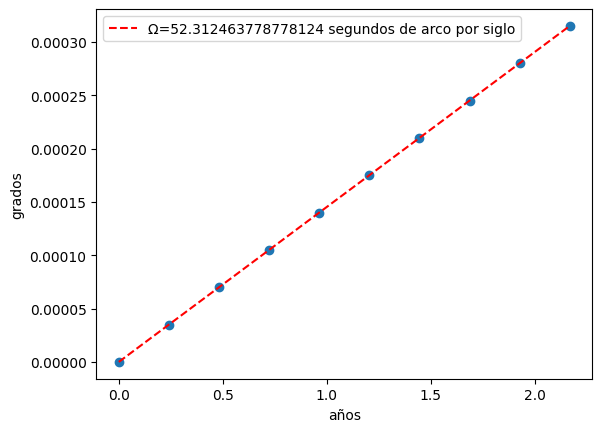

In [20]:
val=numpy.sum(-(perihelios/tiempos)[1:])/(tiempos.size-1)
print(val)
val*=3600*100
plt.plot(tiempos,-perihelios,c="r",linestyle="--",label="Ω="+str(val)+(" segundos de arco por siglo"))
plt.scatter(tiempos,-perihelios)
plt.ylabel("grados")
plt.xlabel("años")
plt.legend()